# <div align='center'>Cats Vs Dogs</div>



<div align='center'>Here I shall implement a simple CNN model in <i>Keras</i> to do the classification task. After that I shall use this trained model to demonstrate different techniques to visualise what the CNN has learned in the other notebook.</div>

![CatsVsDogs](./Images/CvsD.jpg)

In [2]:
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#### Importing & Preprocessing Data

In [14]:
Train_dir = "./Data/Train/"
Validation_dir = "./Data/Validation/"

# Rescale the inputs between the range[0,1]
Train_datagen = ImageDataGenerator(rescale=1./255)
Validation_datagen = ImageDataGenerator(rescale=1./255)

# Create a train generator to load data as a batch
Train_Generator = Train_datagen.flow_from_directory(
                    Train_dir,
                    shuffle = True,
                    target_size = (150,150),
                    batch_size = 50,
                    class_mode = 'binary'
                  )
Validation_Generator = Validation_datagen.flow_from_directory(
                        Validation_dir,
                        shuffle = True,
                        target_size = (150,150),
                        batch_size = 50,
                        class_mode = 'binary'    
                    )
print("Dog class: 1")
print("Cat class: 0")

Found 18750 images belonging to 2 classes.
Found 6250 images belonging to 2 classes.
Dog class: 1
Cat class: 0


In [4]:
Data, Labels = Train_Generator.next()
Datav,LabelsV = Validation_Generator.next()

print("Shape of each Training Input_Batch:", Data.shape)
print("No of Training Samples:", Data.shape[0]*len(Train_Generator))
print("Shape of each Validation Input_Batch:", Datav.shape)
print("No of Validation Samples:", Datav.shape[0]*len(Validation_Generator))

Shape of each Training Input_Batch: (50, 150, 150, 3)
No of Training Samples: 18750
Shape of each Validation Input_Batch: (50, 150, 150, 3)
No of Validation Samples: 6250


#### Visualizing the Data

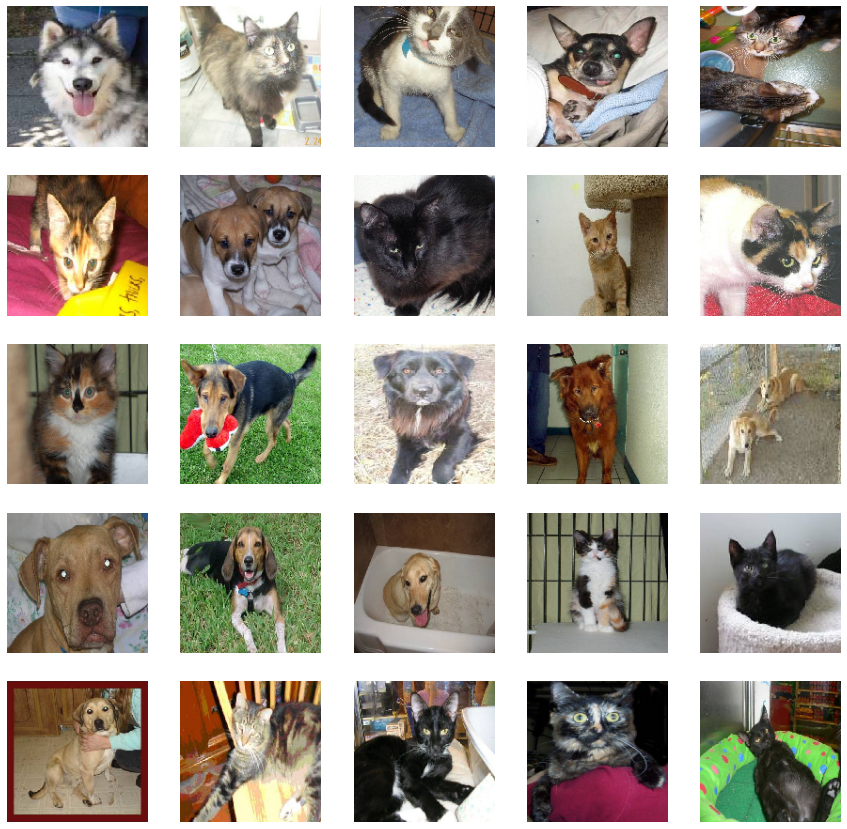

In [5]:
# Plot a 5x5 grid of images
fig, ax = plt.subplots(5, 5,figsize=(15,15))
idx=0

for i in range(5):
    for j in range(5):
        ax[i,j].imshow(Data[idx])
        ax[i,j].axis('off')
        idx+=1

#### Model

In [38]:
# Create a Keras sequential model
Model = models.Sequential()

# Add the different layers to the model
Model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
Model.add(layers.Conv2D(32,(3,3),activation='relu'))
Model.add(layers.MaxPool2D((2,2)))
Model.add(layers.Conv2D(64,(3,3),activation='relu'))
Model.add(layers.Conv2D(64,(3,3),activation='relu'))
Model.add(layers.Dropout(0.2))
Model.add(layers.MaxPool2D((2,2)))
Model.add(layers.Conv2D(128,(3,3),activation='relu'))
Model.add(layers.Dropout(0.2))
Model.add(layers.MaxPool2D((2,2)))
Model.add(layers.Conv2D(128,(3,3),activation='relu'))
Model.add(layers.Dropout(0.2))
Model.add(layers.MaxPool2D((2,2)))
Model.add(layers.Flatten())
Model.add(layers.Dense(512,activation='relu'))
Model.add(layers.Dropout(0.2))
Model.add(layers.Dense(256,activation='relu'))
Model.add(layers.Dropout(0.2))
Model.add(layers.Dense(1,activation='sigmoid'))

# Print the model layers
Model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 69, 69, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 34, 34, 64)       

#### LossFn & Optimizer

In [42]:
Model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [43]:
history = Model.fit_generator(Train_Generator,
                              epochs=30,
                              verbose = 1,
                              validation_data=Validation_Generator)

Epoch 1/30
375/375 [==============================] - 1132s 3s/step - loss: 0.6901 - acc: 0.5483 - val_loss: 0.6921 - val_acc: 0.6686
Epoch 2/30
375/375 [==============================] - 1138s 3s/step - loss: 0.5726 - acc: 0.7112 - val_loss: 0.4703 - val_acc: 0.7661
Epoch 3/30
375/375 [==============================] - 1139s 3s/step - loss: 0.4719 - acc: 0.7795 - val_loss: 0.5437 - val_acc: 0.7878
Epoch 4/30
375/375 [==============================] - 1141s 3s/step - loss: 0.4110 - acc: 0.8142 - val_loss: 0.4289 - val_acc: 0.8464
Epoch 5/30
375/375 [==============================] - 1140s 3s/step - loss: 0.3647 - acc: 0.8434 - val_loss: 0.4125 - val_acc: 0.8254
Epoch 6/30
375/375 [==============================] - 1140s 3s/step - loss: 0.3193 - acc: 0.8651 - val_loss: 0.4783 - val_acc: 0.8309
Epoch 7/30
375/375 [==============================] - 1141s 3s/step - loss: 0.2822 - acc: 0.8803 - val_loss: 0.1641 - val_acc: 0.8562
Epoch 8/30
375/375 [==============================] - 1140s 3s

#### Plotting the Models Performance

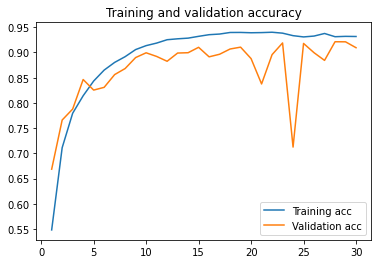

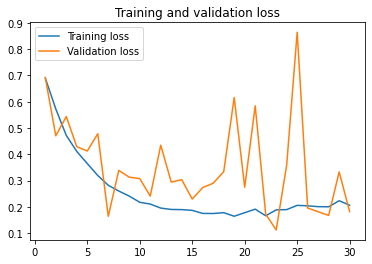

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Saving

In [46]:
Model.save('cats_and_dogs_small_v2.h5')